In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [124]:
index = pd.read_csv('data/basic_index/index_full.csv')
del index['Unnamed: 0']

FileNotFoundError: [Errno 2] File b'data/basic_index/index_full.csv' does not exist: b'data/basic_index/index_full.csv'

In [125]:
# Creating a dict of dataframes, separated by Index Year
# This can easily be changed to seperate by Country instead if desired
unique_country = index['Name'].unique()

country_dict_df = {elem : pd.DataFrame() for elem in unique_country}
country_dict_df

for key in country_dict_df.keys():
    country_dict_df[key] = index[:][index['Name'] == key]

In [126]:
Ireland_data = country_dict_df['Ireland']
Ireland_data.set_index("Index Year")
Ireland_data = Ireland_data.drop(Ireland_data.index[[0,1]])
Ireland_data = Ireland_data.drop(Ireland_data.columns[[5,8]], axis=1)
Ireland_data

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Tax Burden,Government Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
441,Ireland,2005,80.8,90.0,75.0,72.6,64.5,85.0,78.2,82.5,80.2,90.0,90.0
624,Ireland,2006,82.2,90.0,75.0,72.0,64.7,93.7,79.6,84.4,82.4,90.0,90.0
807,Ireland,2007,82.6,90.0,74.0,71.7,65.9,92.1,80.6,85.3,86.6,90.0,90.0
990,Ireland,2008,82.5,90.0,74.0,71.5,64.5,93.0,81.1,84.9,86.0,90.0,90.0
1173,Ireland,2009,82.2,90.0,75.0,69.2,64.9,93.0,79.7,84.3,85.8,90.0,90.0
1356,Ireland,2010,81.3,90.0,77.0,71.1,61.8,92.8,79.0,79.0,87.5,95.0,80.0
1539,Ireland,2011,78.7,90.0,80.0,72.1,47.1,92.0,77.5,80.7,87.6,90.0,70.0
1723,Ireland,2012,76.9,90.0,80.0,73.9,30.4,92.8,78.4,76.7,87.1,90.0,70.0
1908,Ireland,2013,75.7,90.0,75.0,73.8,28.8,83.4,76.6,82.8,86.8,90.0,70.0
2094,Ireland,2014,76.2,90.0,74.8,74.0,30.6,83.4,79.5,81.7,87.8,90.0,70.0


In [127]:
#X = Ireland_data["Index Year"].values.reshape(-1,1)
#y = Ireland_data['Overall Score'].tolist()

X = Ireland_data.drop(Ireland_data.columns[[0,1]], axis=1)
y = Ireland_data['Index Year'].tolist()
y

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [116]:
model = LinearRegression()
model.fit(X,y)
score = model.score(X,y)
print(f'R^2 Score: {score}')

R^2 Score: 0.956806024499205


In [117]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [ 0.01930596 -0.24519655  0.16415486  0.33894362  0.04166618 -0.15566749
 -0.03394173  0.22840347  0.60937187  0.03397604 -0.20723622]
y-axis intercept:  1950.298930228839


In [118]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 2005
Predicted output: 2005.6330663640051
Prediction Error: 0.6330663640051171


In [119]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,2005.633066,2005,0.633066
1,2005.837821,2006,-0.162179
2,2008.609756,2007,1.609756
3,2007.867648,2008,-0.132352
4,2007.051709,2009,-1.948291
5,2010.000000,2010,0.000000
6,2012.695872,2011,1.695872
7,2011.202013,2012,-0.797987
8,2012.992330,2013,-0.007670
9,2013.371637,2014,-0.628363


In [120]:
y = Ireland_data["Overall Score"].values.reshape(-1,1)
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()

In [121]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

ValueError: Found array with dim 3. Estimator expected <= 2.

ValueError: x and y must be the same size

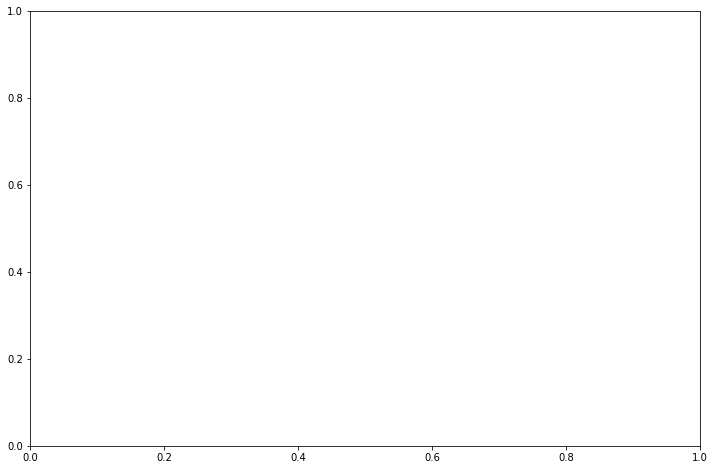

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min_actual, y_max_actual], c='red')
plt.xlabel("2013 Index of Economic Freedom Score")
plt.ylabel("2013 Diversity Index")
plt.title("Single-Variable Regression of 2013 IEF Score vs. Diversity Score")
plt.show()